<a href="https://colab.research.google.com/github/yiyangli00/classify_news_ariticles/blob/main/Project_1_End_to_End_Pipeline_to_Classify_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Team Members:
#### Shihao Yang, Elena Li, Yuning Sun


In [ ]:
#Import needed packages
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from pickle import dump
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import random
#Q2:Feature Extraction
from sklearn.model_selection import train_test_split

#Q3
import re

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfTransformer

#Q4:Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd

#Q5:SVM
from sklearn.svm import SVC, LinearSVC
import itertools
import sklearn as sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.model_selection import GridSearchCV

#Q6:Logistic Regression
from sklearn.linear_model import LogisticRegression

#Q7:Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

#Q8:Gridsearch 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

#for stemming
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from pickle import dump
from nltk.stem import PorterStemmer
porter = PorterStemmer()

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
%cd /content/drive/MyDrive/ECE 219 Projects/Projecct1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ECE 219 Projects/Projecct1


In [ ]:
# Read in the dataset
data = pd.read_csv('/content/drive/MyDrive/ECE 219 Projects/Projecct1/Project1-Classification.csv')
data.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


### Question 1
#### Overview: How many rows (samples) and columns (features) are present in the dataset?
#### Histograms: Plot 3 histograms on : (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis; (b) The column leaf label – class on the x-axis; (c) The column root label – class on the x-axis.
#### Interpret Plots: Provide qualitative interpretations of the histograms.

In [ ]:
#Overview
data.shape
#ANS: We have 3150 rows and 8 columns in the dataset

(3150, 8)

In [ ]:
data['char_len']=data.full_text.str.len()
data['char_len'].describe()

count      3150.000000
mean       3353.305079
std        4123.449663
min          53.000000
25%        1288.000000
50%        2631.000000
75%        4281.000000
max      100002.000000
Name: char_len, dtype: float64

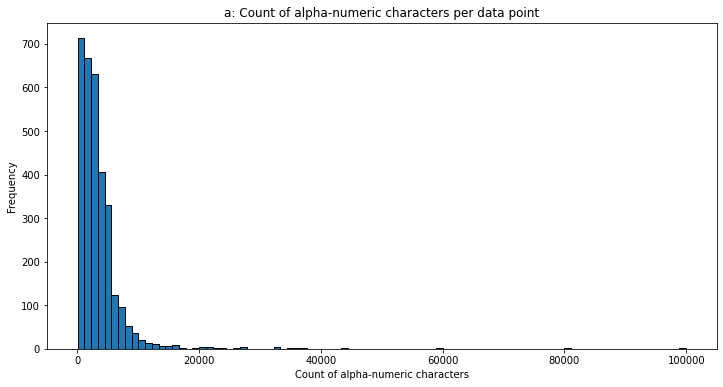

In [ ]:
#Histograms
# print(data['char_len'][1])
# print(data['char_len'].max())
# print(data['char_len'].min())
# print(data['char_len'].mean())
# data['char_len'].describe()
#(a)
plt.figure(figsize=(12,6))
plt.hist(data.char_len,bins=90,edgecolor='black')
plt.xlabel('Count of alpha-numeric characters')
plt.ylabel('Frequency')
plt.title("a: Count of alpha-numeric characters per data point")
plt.show()

#### Quantitative Interpretion
1. Based on the basic statistic data description, the min value is 53 and the max is 10,002; the mean is 3353 which gives us the right skewed distriburion.
2. 50% of the data points have less than 1,288 alpha_numeric characters.

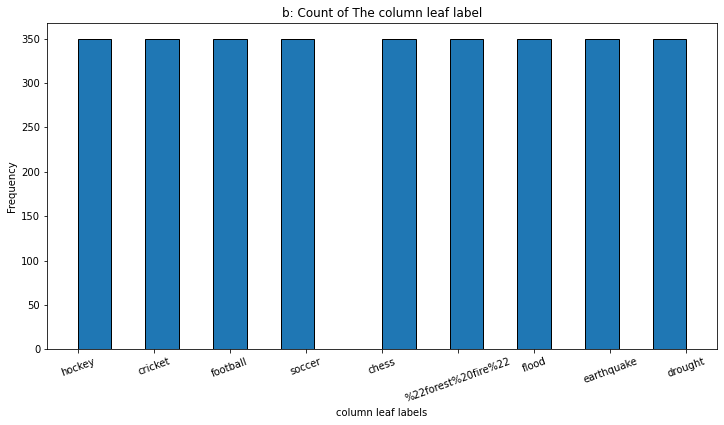

In [ ]:
#(b)
plt.figure(figsize=(12,6))
plt.hist(data.leaf_label,bins=18,edgecolor='black')
plt.xticks(rotation =20)
plt.xlabel('column leaf labels')
plt.ylabel('Frequency')
plt.title("b: Count of The column leaf label")
plt.show()

#### Quantitative Intepretion
1. There are 9 classes of leaf_label in total.
2. Each has the equal number of the data points: 350

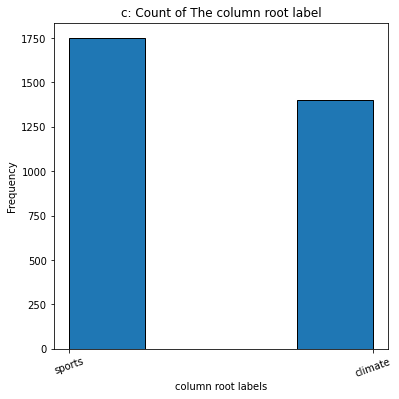

In [ ]:
#(c)
plt.figure(figsize=(6,6))
plt.hist(data.root_label,bins=4,edgecolor='black')
plt.xticks(rotation =20)
plt.xlabel('column root labels')
plt.ylabel('Frequency')
plt.title("c: Count of The column root label")
plt.show()

####Quantitative Interpretion
1. There are in total 2 classes in root_label: Sports and Climate
2. Sports have 1750 data points while Climate have 1400.

In [ ]:
#set the random seed as follows to ensure consistency
import random
np.random.seed(42)
random.seed(42)

##Binary Classification

In [ ]:
#Splitting the entire dataset into training and testing data
train, test = train_test_split(data[["full_text","root_label"]], test_size=0.2)

##Question 2
Report the number of training and testing samples.

In [ ]:
# Training set
train.shape
#ANS: We have 2520 rows and 2 columns in the training dataset

(2520, 2)

In [ ]:
# Testing set
test.shape
#ANS: We have 630 rows and 2 columns in the testing dataset

(630, 2)

##Feature Extraction

In [ ]:
#paste the clean alg here:
def clean(text):
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    texter = re.sub(r"[0-9]","", texter)
    texter = re.sub('[^a-zA-Z0-9\n]', ' ', texter)
    texter = re.sub('\s+',' ', texter)
    texter = texter.lower()
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [ ]:
#clean each data sample using the code block provided above.
train_clean = train['full_text'].apply(clean)

In [ ]:
train['full_text']= train['full_text'].apply(clean)

In [ ]:
train['full_text'][1]

' hko hockey canada sponsorship hockey canada has lost million in sponsorships that have been either suspended or cancelled since revelations emerged this summer that the organization that oversees amateur hockey paid millions of dollars in settlements for sexual misconduct claims going back to the s the loss of hockey canada s sponsor support has been significant the organization said in a statement to the financial post confirming the figures which have not been previously reported as the headlines grew progressively negative sponsors such as bank of nova scotia telus corp and restaurant brands international inc s tim hortons put their financial relationships with hockey canada on pause or insisted that their contributions be used only for women s hockey in october canadian tire corp ltd cut all ties with hockey canada saying that the organization was resisting meaningful change and therefore we can no longer confidently move forward together a canadian tire store in toronto the tall

In [ ]:
#Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
counts = []

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    return [lem.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


def rmv_nums(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) 
            if not word.isdigit())
    

vectorizer = CountVectorizer(min_df=3,stop_words='english')

X_train_counts=vectorizer.fit_transform(train['full_text']) 
print('Shape of train lemmatized matrix: ', X_train_counts.shape) 
X_test_counts=vectorizer.transform(test["full_text"]) 
print('Shape of test lemmatized matrix:  ', X_test_counts.shape) 

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('Shape of train TF-IDF matrix: ',X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print('Shape of test TF-IDF matrix:  ',X_test_tfidf.shape)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Shape of train lemmatized matrix:  (2520, 16995)
Shape of test lemmatized matrix:   (630, 16995)
Shape of train TF-IDF matrix:  (2520, 16995)
Shape of test TF-IDF matrix:   (630, 16995)


In [ ]:
vectorizer

CountVectorizer(min_df=3, stop_words='english')

# Q4 - Dimensionality Reduction

The MSE of using LSI: 1724.166107441703
The MSE of using NMF: 1749.4681565165015


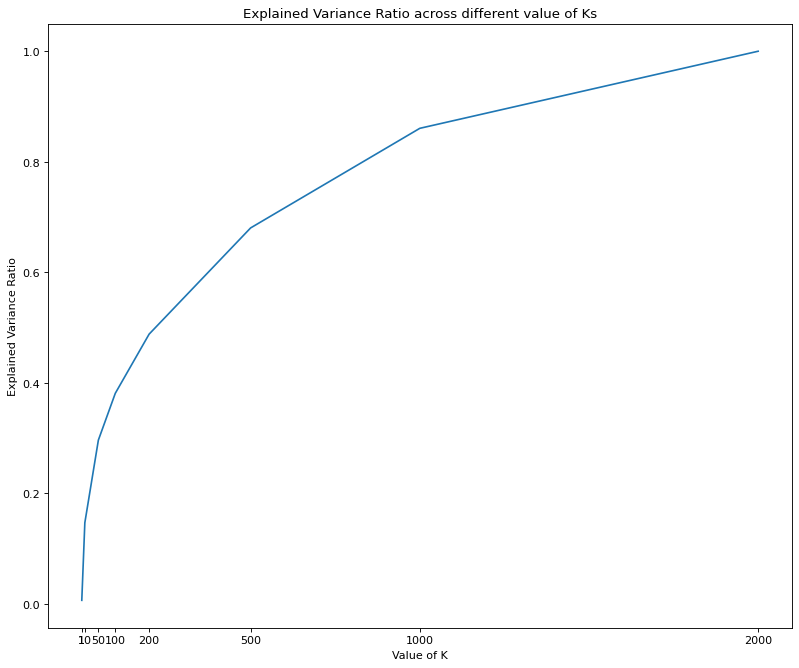

In [ ]:
#plot
k = [1, 10, 50, 100, 200, 500, 1000, 2000]
evr=[]

for i in range(len(k)):
  lsi = TruncatedSVD(n_components=k[i], random_state=42)
  X_train_lsi=lsi.fit_transform(X_train_tfidf)
  X_test_lsi=lsi.transform(X_test_tfidf)
  evr.append(sum(lsi.explained_variance_ratio_))

plt.figure(figsize=(12, 10), dpi=80)
plt.plot(k,evr)
#plot format
plt.xticks(ticks=[1,10,50,100,200,500,1000,2000],labels=["1","10","50","100","200","500","1000","2000"])
plt.title("Explained Variance Ratio across different value of Ks")
plt.xlabel("Value of K")
plt.ylabel("Explained Variance Ratio")

#Latent Semantic Indexing (LSI) k=50
#LSI MSE
u,sigma,vt = randomized_svd(X_train_tfidf,n_components=50,random_state=42)
MSE_lsi=np.sum(np.square((np.dot(np.dot(u,np.diag(sigma)),vt))-X_train_tfidf))
print("The MSE of using LSI: "+str(MSE_lsi))

#Non-negative Matrix Factorization (NMF) k=50
nmf = NMF(n_components=50, init='random', random_state=42, max_iter=500) #to remove limitation warning
X_train_nmf = nmf.fit_transform(X_train_tfidf)
X_test_nmf = nmf.transform(X_test_tfidf)
#NMF MSE
MSE_nmf=(np.sum(np.square(np.dot(X_train_nmf, nmf.components_)-X_train_tfidf)))
print("The MSE of using NMF: "+str(MSE_nmf))



# Classification Algorithm
## Map Labels to Binary


In [ ]:
# Construct lsi data with k=50 for svm
lsi = TruncatedSVD(n_components = 50,n_iter = 10, random_state = 42)
lsi_train_svm = lsi.fit_transform(X_train_tfidf)
lsi_test_svm = lsi.transform(X_test_tfidf)

# Construct labels
mapping = {'sports': 1, 'climate': 0}
train_svm = train
train_svm = train_svm.replace({'root_label': mapping})
train_svm_label = train_svm['root_label'].to_numpy()
print(train_svm_label.shape)

test_svm = test
test_svm = test_svm.replace({'root_label': mapping})
test_svm_label = test_svm['root_label'].to_numpy()
print(test_svm_label.shape)

(2520,)
(630,)


In [ ]:
lsi_train_svm.shape

(2520, 50)

# Q5 - Support Vector Machines (SVM)

## Train two linear SVMs:

In [ ]:
from sklearn.svm import SVC, LinearSVC
import itertools
import sklearn as sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [ ]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,
                          classes = ['sports', 'climate']
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def implement_svm(Gamma):

    svc = SVC(C = Gamma, probability=True, kernel='linear')
    svc.fit(lsi_train_svm, train_svm_label)
    svc_predict = svc.predict(lsi_test_svm)

    accuracy = sklearn.metrics.accuracy_score(test_svm_label, svc_predict)
    recall = sklearn.metrics.recall_score(test_svm_label, svc_predict)
    precision = sklearn.metrics.precision_score(test_svm_label, svc_predict)
    f1 = sklearn.metrics.f1_score(test_svm_label, svc_predict)

    print('Accuracy:'+str(accuracy))
    print('Recall:'+str(recall))
    print('Precision:'+str(precision))
    print('F1 score:'+str(f1))

    fpr, tpr, thresholds = roc_curve(test_svm_label, svc.decision_function(lsi_test_svm))
    plt.plot(fpr,tpr,'forestgreen')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return svc_predict, fpr, tpr

def plot_roc_cnfmatrix(y_pred):
    #report confusion matrix
    cnf_matrix = sklearn.metrics.confusion_matrix(test_svm_label, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
    plt.show()
    return

Gamma:1000
Accuracy:0.9634920634920635
Recall:0.9509536784741145
Precision:0.9858757062146892
F1 score:0.9680998613037448


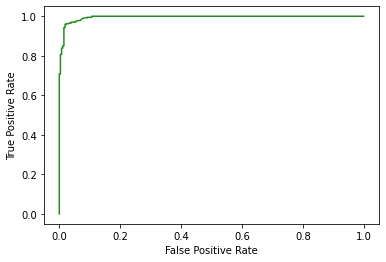

Confusion matrix, without normalization
[[258   5]
 [ 18 349]]


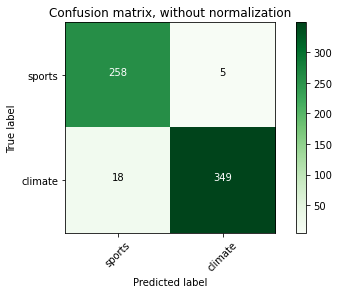

In [ ]:
#Gamma = 1000 (Hard margin)
Gamma = 1000
print('Gamma:'+ str(Gamma))
y_pred, fpr_hard, tpr_hard = implement_svm(Gamma)
plot_roc_cnfmatrix(y_pred)

C value: 0.0001
Gamma:0.0001
Accuracy:0.5825396825396826
Recall:1.0
Precision:0.5825396825396826
F1 score:0.7362086258776329


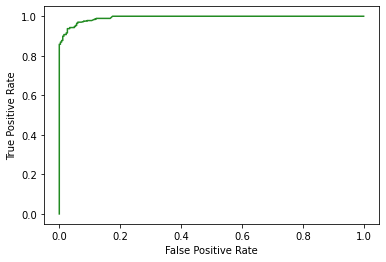

Confusion matrix, without normalization
[[  0 263]
 [  0 367]]


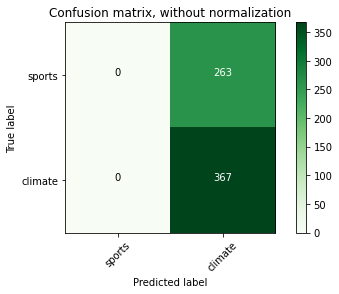

In [ ]:
#Gamma = 0.0001 (Soft margin)
Gamma = 0.0001
print('C value: '+str(Gamma))
print('Gamma:'+ str(Gamma))
y_pred, fpr_soft, tpr_soft = implement_svm(Gamma)
plot_roc_cnfmatrix(y_pred)

## Use cross-validation to choose Gamma

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [10**k for k in range(-3,7,1)]}
svm_cv = SVC(probability = True, kernel = 'linear')
svm_cv_grid = GridSearchCV(svm_cv, parameters, cv=5, n_jobs = 1, verbose = 3)
svm_cv_grid.fit(lsi_train_svm, train_svm_label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...........................C=0.001;, score=0.548 total time=   0.6s
[CV 2/5] END ...........................C=0.001;, score=0.548 total time=   0.6s
[CV 3/5] END ...........................C=0.001;, score=0.550 total time=   0.6s
[CV 4/5] END ...........................C=0.001;, score=0.550 total time=   0.6s
[CV 5/5] END ...........................C=0.001;, score=0.550 total time=   0.6s
[CV 1/5] END ............................C=0.01;, score=0.548 total time=   0.6s
[CV 2/5] END ............................C=0.01;, score=0.548 total time=   0.6s
[CV 3/5] END ............................C=0.01;, score=0.550 total time=   0.6s
[CV 4/5] END ............................C=0.01;, score=0.550 total time=   0.6s
[CV 5/5] END ............................C=0.01;, score=0.550 total time=   0.6s
[CV 1/5] END .............................C=0.1;, score=0.925 total time=   0.4s
[CV 2/5] END .............................C=0.1;

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000]},
             verbose=3)

In [ ]:
#Result of CV
print(pd.DataFrame(svm_cv_grid.cv_results_)[['param_C','mean_test_score']].sort_values(by=['mean_test_score'], ascending=False))

   param_C  mean_test_score
5      100         0.951984
4       10         0.950397
6     1000         0.949603
9  1000000         0.948810
8   100000         0.948810
7    10000         0.948413
3        1         0.948016
2      0.1         0.934921
0    0.001         0.548810
1     0.01         0.548810


C value: 10
Accuracy:0.9666666666666667
Recall:0.9591280653950953
Precision:0.9832402234636871
F1 score:0.9710344827586207


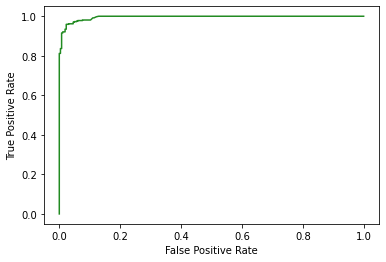

Confusion matrix, without normalization
[[257   6]
 [ 15 352]]


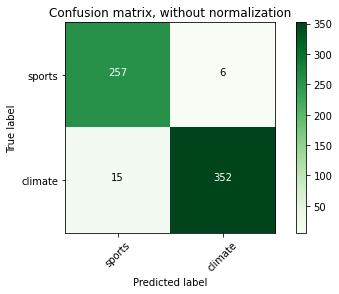

In [ ]:
# Report of the best SVM

#Gamma = svm_cv_grid.best_params_['C']
Gamma = 10

svc_best = SVC(C = Gamma, probability=True, kernel = 'linear')
svc_best.fit(lsi_train_svm, train_svm_label)
svc_best_predict = svc_best.predict(lsi_test_svm)

accuracy = sklearn.metrics.accuracy_score(test_svm_label, svc_best_predict)
recall = sklearn.metrics.recall_score(test_svm_label, svc_best_predict)
precision = sklearn.metrics.precision_score(test_svm_label, svc_best_predict)
f1 = sklearn.metrics.f1_score(test_svm_label, svc_best_predict)

print('C value: '+str(Gamma))
print('Accuracy:'+str(accuracy))
print('Recall:'+str(recall))
print('Precision:'+str(precision))
print('F1 score:'+str(f1))

# Plot ROC curve
fpr_best, tpr_best, thresholds = roc_curve(test_svm_label, svc_best.decision_function(lsi_test_svm))
plt.plot(fpr_best,tpr_best,'forestgreen')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Report confusion matrix
cnf_matrix_best = sklearn.metrics.confusion_matrix(test_svm_label, svc_best_predict)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_best,
                  title='Confusion matrix, without normalization')
plt.show()

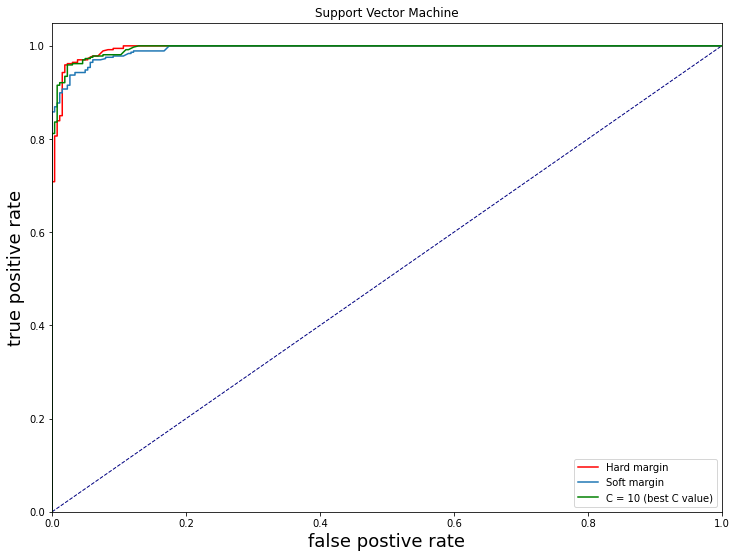

area under hard margin 0.9948923032293491
area under soft margin 0.9932657141969105
area under best SVM (C=10) 0.9951616746614727


In [ ]:
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=23)

plt.plot(fpr_hard,tpr_hard, 'r', label='Hard margin')
plt.plot(fpr_soft,tpr_soft, label='Soft margin')
plt.plot(fpr_best,tpr_best,'g',label = 'C = 10 (best C value)')
plt.legend()
plt.title('Support Vector Machine')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.show()

# area under the curve:
roc_auc_hard = auc(fpr_hard,tpr_hard)
roc_auc_soft = auc(fpr_soft,tpr_soft)
roc_auc_best = auc(fpr_best,tpr_best)
print("area under hard margin", roc_auc_hard)
print("area under soft margin", roc_auc_soft)
print("area under best SVM (C=10)", roc_auc_best)

# Q6 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#construct lsi data with k=50 for Logistic Regression
lsi = TruncatedSVD(n_components = 50,n_iter = 10, random_state = 42)
lsi_train_lr = lsi.fit_transform(X_train_tfidf)
lsi_test_lr = lsi.transform(X_test_tfidf)

In [ ]:
from sklearn.model_selection import GridSearchCV
#without regularization
lr_no_regularization = LogisticRegression(penalty = 'none', max_iter=10000)
lr_no_regularization.fit(lsi_train_lr, train_svm_label)
lr_no_regularization_predicted = lr_no_regularization.predict(lsi_test_lr)

parameters = {'C':[10**k for k in range(-4,5,1)]}

#L1
lr_L1 = LogisticRegression(solver='liblinear', penalty = 'l1', max_iter=10000)
lr_L1_grid = GridSearchCV(lr_L1, parameters, cv=5, n_jobs=1)
lr_L1_grid.fit( lsi_train_lr, train_svm_label)
#Result of CV
print('L1')
print(pd.DataFrame(lr_L1_grid.cv_results_)[['param_C','mean_test_score']].sort_values(by=['mean_test_score'], ascending=False))
print('\n')

#L2
lr_L2 = LogisticRegression(solver='liblinear', penalty = 'l2', max_iter=10000)
lr_L2_grid = GridSearchCV(lr_L2, parameters, cv=5, n_jobs=1)
lr_L2_grid.fit(lsi_train_lr, train_svm_label)
#Result of CV
print('L2')
print(pd.DataFrame(lr_L2_grid.cv_results_)[['param_C','mean_test_score']].sort_values(by=['mean_test_score'], ascending=False))

L1
  param_C  mean_test_score
5      10         0.951984
6     100         0.951587
7    1000         0.951190
8   10000         0.951190
4       1         0.946825
3     0.1         0.923016
0  0.0001         0.451190
1   0.001         0.451190
2    0.01         0.451190


L2
  param_C  mean_test_score
6     100         0.952381
7    1000         0.951984
8   10000         0.951190
5      10         0.950794
4       1         0.942063
3     0.1         0.921429
2    0.01         0.689286
0  0.0001         0.548810
1   0.001         0.548810


In [ ]:
def report_lr(penalty, C):

  if penalty != 'none':
    solver = 'liblinear'
  else:
    solver = 'lbfgs'

  lr = LogisticRegression(penalty=penalty, max_iter=10000, solver=solver)
  lr.fit(lsi_train_lr, train_svm_label)
  lr_pred = lr.predict(lsi_test_lr)

  print('Accuracy: ' + str(accuracy_score(test_svm_label.ravel(), lr_pred)))
  print('Precision: ' + str(precision_score(test_svm_label.ravel(), lr_pred)))
  print('Recall: ' + str(recall_score(test_svm_label.ravel(), lr_pred)))
  print('F-1 Score: ' + str(f1_score(test_svm_label.ravel(), lr_pred)))

  #compute confusion matrix
  cnf_lr_matrix = confusion_matrix(test_svm_label, lr_pred)
  np.set_printoptions(precision=2)

  #Plot confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_lr_matrix, 
                        title='Confusion matrix for Linear Regression, without normalization'
                        )
  plt.show() 

  #ROC Curve
  fpr_lr, tpr_lr, thresholds = roc_curve(test_svm_label, lr.decision_function(lsi_test_lr))
  plt.plot(fpr_lr, tpr_lr, color = 'forestgreen')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC Curve for Linear Regression, without normalization")
  plt.show()

  return fpr_lr, tpr_lr

------Report of Linear Regression model without regularizaiton------

Accuracy: 0.9634920634920635
Precision: 0.9886363636363636
Recall: 0.9482288828337875
F-1 Score: 0.9680111265646733
Confusion matrix, without normalization
[[259   4]
 [ 19 348]]


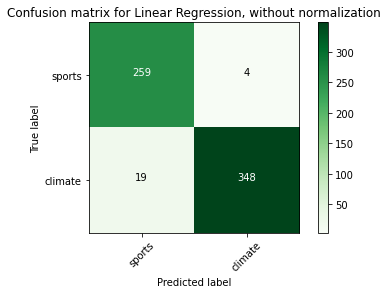

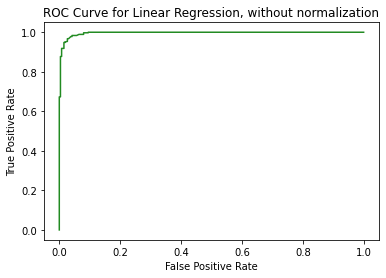

------Report of Linear Regression model with L1 regularizaiton------

C value : 10
Accuracy: 0.9571428571428572
Precision: 0.9696132596685083
Recall: 0.9564032697547684
F-1 Score: 0.9629629629629629
Confusion matrix, without normalization
[[252  11]
 [ 16 351]]


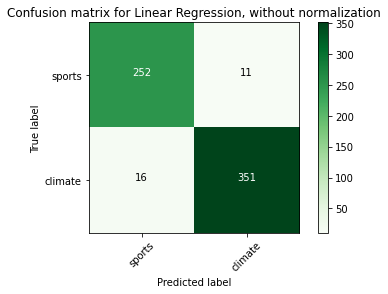

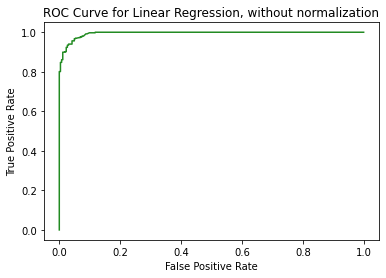



------Report of Linear Regression model with L2 regularizaiton------

C value: 100
Accuracy: 0.9603174603174603
Precision: 0.9672131147540983
Recall: 0.9645776566757494
F-1 Score: 0.965893587994543
Confusion matrix, without normalization
[[251  12]
 [ 13 354]]


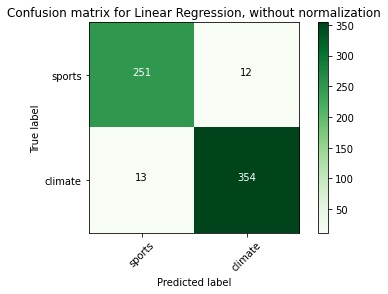

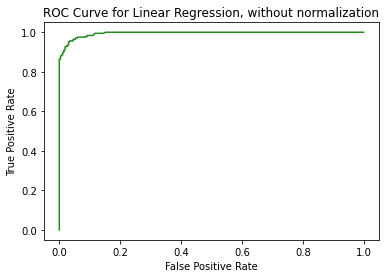

In [ ]:
#No regularization
print('------Report of Linear Regression model without regularizaiton------\n')
penalty = 'none'
C = 1
fpr_L0, tpr_L0 = report_lr(penalty, C)


#L1
print('------Report of Linear Regression model with L1 regularizaiton------\n')
penalty = 'l1'
C = lr_L1_grid.best_params_['C']
print('C value : '+str(C))
fpr_L1, tpr_L1 = report_lr(penalty, C)
print('\n')

#L2
print('------Report of Linear Regression model with L2 regularizaiton------\n')
penalty = 'l2'
C = lr_L2_grid.best_params_['C']
print('C value: '+str(C))
fpr_L2, tpr_L2 = report_lr(penalty, C)


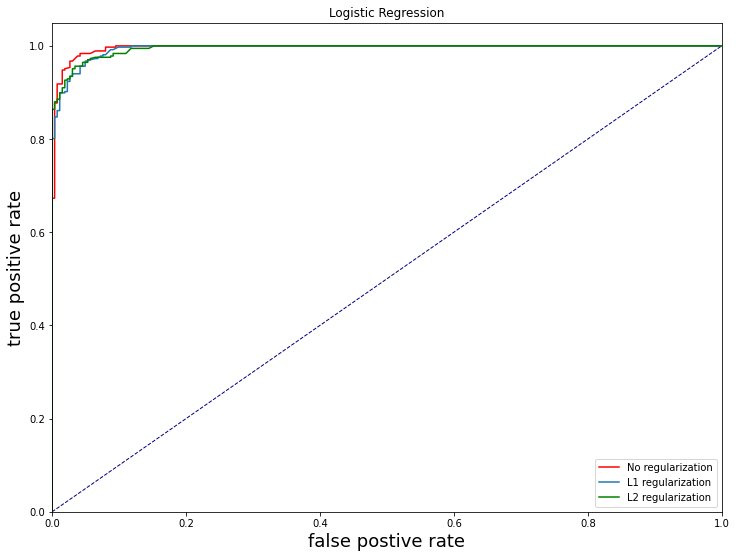

area under no regularization 0.9961355559929963
area under L1 regularization 0.9944053625635872
area under L2 regularization 0.9946022109178314


In [ ]:
plt.figure(figsize=(12,9))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=23)

plt.plot(fpr_L0,tpr_L0, 'r', label='No regularization')
plt.plot(fpr_L1,tpr_L1, label='L1 regularization')
plt.plot(fpr_L2,tpr_L2,'g',label = 'L2 regularization')
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.show()

# area under the curve:
roc_auc_none = auc(fpr_L0,tpr_L0)
roc_auc_l1 = auc(fpr_L1,tpr_L1)
roc_auc_l2 = auc(fpr_L2,tpr_L2)
print("area under no regularization", roc_auc_none)
print("area under L1 regularization", roc_auc_l1)
print("area under L2 regularization", roc_auc_l2)

#Q7 - Naive Bayes Model

Confusion matrix, without normalization
[[182  81]
 [106 261]]


<Figure size 432x288 with 0 Axes>

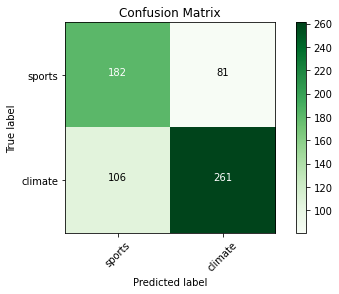

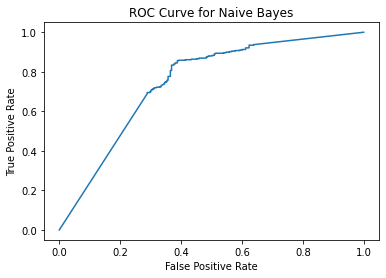

Accuracy: 0.7031746031746032
Precision: 0.7631578947368421
Recall: 0.7111716621253406
F-1 Score: 0.7362482369534556


In [ ]:
#Train a GaussianNB classifier
plt.gcf().clear()
gnb = GaussianNB()
gnb.fit(X_train_lsi, train_svm_label)
pred = gnb.predict(X_test_lsi)

#compute confusion matrix
cnf_matrix = metrics.confusion_matrix(test_svm_label, pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,title="Confusion Matrix")
plt.show() 

#Plot the ROC curve
#fpr_best, tpr_best, thresholds = roc_curve(test_svm_label, svc_best.decision_function(lsi_test_svm))
fpr, tpr,_ = roc_curve(test_svm_label.ravel(), gnb.predict_proba(X_test_lsi)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Naive Bayes")
plt.show()

#Calculate the accuracy, recall, precision and F-1 score of this classifier on the testing set.
print('Accuracy: ' + str(metrics.accuracy_score(test_svm_label.ravel(), pred)))
print('Precision: ' + str(metrics.precision_score(test_svm_label.ravel(), pred)))
print('Recall: ' + str(metrics.recall_score(test_svm_label.ravel(), pred)))
print('F-1 Score: ' + str(metrics.f1_score(test_svm_label.ravel(), pred)))


# Q8 - Grid Search of Parameters

In [ ]:
# Create a temporary folder to store the transformers of the pipeline
location = "cachedir"
memory = Memory(location=location, verbose=10)

# Delete the temporary cache before exiting
memory.clear(warn=False)
rmtree(location)

In [ ]:
####################################################
#              Pipeline and options                #
# 1. cleaning                                      #
# 2. Feature Extraction (min_df = 3 vs. 5)         #
# 3. LSI vs. NMF (k = [5, 30, 80])                 #
# 4. Best SVM vs. Best Logistic vs. GaussianNB     #
####################################################
pipe = Pipeline(steps=[
  ("vect", CountVectorizer(stop_words='english',)),
  ("tfidf", TfidfTransformer()),
  ("dim_reduction", TruncatedSVD()),
  ("classifier", SVC(kernel='linear'))
], memory = memory)

In [ ]:
#for k = 5, 30
param_grid = {
    "vect__min_df": [3, 5],
    "dim_reduction": [TruncatedSVD(n_components=5,random_state=42), 
                      TruncatedSVD(n_components=30,random_state=42),
                      #TruncatedSVD(n_components=500,random_state=42),
                      NMF(n_components=5,init='random', random_state=42),
                      NMF(n_components=30,init='random', random_state=42)],
                      #NMF(n_components=500,init='random', random_state=42),
    "classifier": [SVC(C=svm_cv_grid.best_params_['C'],random_state=42), 
                   LogisticRegression(penalty='l2',C=lr_L2_grid.best_params_['C'],random_state=42),
                   LogisticRegression(penalty='l1',C=lr_L1_grid.best_params_['C'],random_state=42,solver = 'liblinear'), 
                   GaussianNB()]
}

#for k= 80
param_grid_80 = {
    "vect__min_df": [3, 5],
    "dim_reduction": [TruncatedSVD(n_components=80,random_state=42),
                      NMF(n_components=80,init='random', random_state=42)],
    "classifier": [SVC(C=svm_cv_grid.best_params_['C'],random_state=42), 
                   LogisticRegression(penalty='l2',C=lr_L2_grid.best_params_['C'],random_state=42),
                   LogisticRegression(penalty='l1',C=lr_L1_grid.best_params_['C'],random_state=42,solver = 'liblinear'), 
                   GaussianNB()]
}

## With Lemmatization



In [ ]:
#Data with cleaning for k = 5, 30
#train['full_text'] is the cleaned train set after lemmatization

grid_clean = GridSearchCV(pipe, cv=5 , n_jobs = 1, param_grid = param_grid, scoring = 'accuracy')
grid_clean.fit(train['full_text'],train_svm_label)
result_clean = pd.DataFrame(grid_clean.cv_results_)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), 406      islamabad ap top order batter fakhar zaman is...
1518     chessboxing jpg international chessboxing tou...
1268     the tennessee state football team won t be ab...
497      by pawan atri min read former pakistan cricke...
342      in appliance conglomerate bosch created a sta...
                              ...                        
3092     some coachella valley homeowners and communit...
1095     about photo gerard pique retired from soccer ...
1130     how much of your donated clothing finds a new...
1294     the tennessee state football team fell out of...
860      wilmington starnews this feature is sponsored...
Name: full_text, Length: 2016, dtype: object, 
array([1, ..., 1]), None, message_clsname='Pipeline', message=None)
__________________________________________

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/b787281904d5d8d4253ddedc7ccc1bfd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/6c56d117e2b97c3985d4dbd757d0141d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/1afbeffc94523c0389d1123e01a630e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/85ba9e6fc1acbb83c404f3e410efebe9
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/256bcc8ea871397960db1e07d1f71d57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5e740f9f7b1d20c3be431f73b2396f10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e1b82fe716df21d74b2c38215e1a5eaa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c6407b59d3e089b9b110924ff137c62
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/014147e35663e5eec916fb9aa11c65f9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/86d2f04be2a9d6e659f99d3e9a62574f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3cbc1101fa820b5ef39c46f85167cf2e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f0f2f843a795939f126a00973566f718
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fb9c4da1f35b2ed5493daee9385c47fa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a8272ea6c3f30c674947a15e247bbf7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5c6ee7ad988ce3b29dfbcc2ea5166cd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e17e003cefe0e28f8272b0d74d85b835
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5dc41e6435ac102ca6477e2691e1379a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/94faa314b6e9f5da187cb66d0b1d6f33
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/422deeba347c092069059bc5737f0127
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e8dc13eb0efcf1c2a8bdaa0cebf3c9ff
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/88fc7ec26c8a39c3195d2e241ab582d8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/8d346a7f63bf9aacce27ad14e4995280
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/98dec079fcfa8cc20e0a0f6ad2e7e625
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fc9fc46c182a07822e91ba269ec9093c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/127923865031f9156aaf09d661b1cc29
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/66f096df1795da5c84f23408103d22b2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f49d59f3d080bc113431ab88078b1af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/c0b1138166ba439e546d8f25133831ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/b787281904d5d8d4253ddedc7ccc1bfd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/85ba9e6fc1acbb83c404f3e410efebe9
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/256bcc8ea871397960db1e07d1f71d57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/99b96bc031c7addadd52c0fb923923d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e1b82fe716df21d74b2c38215e1a5eaa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c6407b59d3e089b9b110924ff137c62
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/83de795cb8143e2a41d9ce17063b0097
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/86d2f04be2a9d6e659f99d3e9a62574f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fb9c4da1f35b2ed5493daee9385c47fa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a8272ea6c3f30c674947a15e247bbf7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/56ad3fd0cfd230ffcf054a18c7d71ee1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e17e003cefe0e28f8272b0d74d85b835
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5dc41e6435ac102ca6477e2691e1379a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/94faa314b6e9f5da187cb66d0b1d6f33
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/14307f4f8bcf21d3662ffa4cea09d2c7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e8dc13eb0efcf1c2a8bdaa0cebf3c9ff
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

In [ ]:
#Result for k=5, 30
print('====================    Result for k=5, 30 with Lemmatization    ====================\n')
result_clean[["param_classifier", 
                    "param_dim_reduction", 
                    "param_vect__min_df", 
                    "mean_test_score"]
                   ].sort_values(by=['mean_test_score'], ascending=False).head()

====================    Result for k=5, 30 with Lemmatization    ====================



,param_classifier,param_dim_reduction,param_vect__min_df,mean_test_score
7,"SVC(C=100, random_state=42)","NMF(init='random', n_components=30, random_sta...",5,0.954365
3,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=30, random_state=42)",5,0.952381
6,"SVC(C=100, random_state=42)","NMF(init='random', n_components=30, random_sta...",3,0.952381
30,GaussianNB(),"NMF(init='random', n_components=30, random_sta...",3,0.951587
2,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=30, random_state=42)",3,0.950794


In [ ]:
#Run data with cleaning GridSearch for k=80

grid_clean_80 = GridSearchCV(pipe, cv=5 , n_jobs = 1, param_grid = param_grid_80, scoring = 'accuracy')
grid_clean_80.fit(train['full_text'],train_svm_label)
result_clean_80 = pd.DataFrame(grid_clean_80.cv_results_)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/66f096df1795da5c84f23408103d22b2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f49d59f3d080bc113431ab88078b1af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=80, random_state=42), <2016x15086 sparse matrix of type '<class 'numpy.float64'>'
	with 336110 stored elements in Compressed Sparse Row format>, 
array([1, ..., 1]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.6s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/s

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 22.6s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e1b82fe716df21d74b2c38215e1a5eaa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c6407b59d3e089b9b110924ff137c62
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x15292 sparse matrix of type '<class 'numpy.float64'>'
	with 338962 stored elements in Compressed Sparse Row format>, 
array([0, ..., 1]), None, message_clsname='Pipeline', message=None)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 23.0s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/86d2f04be2a9d6e659f99d3e9a62574f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3cbc1101fa820b5ef39c46f85167cf2e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x15153 sparse matrix of type '<class 'numpy.float64'>'
	with 330020 stored elements in Compressed Sparse Row format>, 
array([0, ..., 1]), None, message_clsname='Pipeline', message=None)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 22.6s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fb9c4da1f35b2ed5493daee9385c47fa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a8272ea6c3f30c674947a15e247bbf7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x10584 sparse matrix of type '<class 'numpy.float64'>'
	with 320928 stored elements in Compressed Sparse Row format>, 
array([1, ..., 1]), None, message_clsname='Pipeline', message=None)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.6s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e17e003cefe0e28f8272b0d74d85b835
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ed24d4f44ef18c864477d77ce8f73fbe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x10120 sparse matrix of type '<class 'numpy.float64'>'
	with 315833 stored elements in Compressed Sparse Row format>, 
array([0, ..., 1]), None, message_clsname='Pipeline', message=None)
_______________________________________________fit_transform_one - 12

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.5s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e8dc13eb0efcf1c2a8bdaa0cebf3c9ff
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/88fc7ec26c8a39c3195d2e241ab582d8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x10580 sparse matrix of type '<class 'numpy.float64'>'
	with 323013 stored elements in Compressed Sparse Row format>, 
array([0, ..., 1]), None, message_clsname='Pipeline', message=None)
_______________________________________________fit_transform_one - 16

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 17.0s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/66f096df1795da5c84f23408103d22b2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f49d59f3d080bc113431ab88078b1af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/c1441829534eadfe915083ff25dc7e1c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/b787281904d5d8d4253ddedc7ccc1bfd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/6c56d117e2b97c3985d4dbd757d0141d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/130f0a36ecf736602bdd84a6638dc1fb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/85ba9e6fc1acbb83c404f3e410efebe9
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/256bcc8ea871397960db1e07d1f71d57
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e9e09b6ad1bf6425d53e26f9986c7633
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e1b82fe716df21d74b2c38215e1a5eaa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c6407b59d3e089b9b110924ff137c62
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5539c92bcad4c32915ec6573ec1dcd03
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/86d2f04be2a9d6e659f99d3e9a62574f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3cbc1101fa820b5ef39c46f85167cf2e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/cf5749bdf941b411c60b4651626af1a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fb9c4da1f35b2ed5493daee9385c47fa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a8272ea6c3f30c674947a15e247bbf7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/0b3b087c1c7b8a14728c6d74cfe12fbc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e17e003cefe0e28f8272b0d74d85b835
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ed24d4f44ef18c864477d77ce8f73fbe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ade71249feb5710f52533400227bf740
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5dc41e6435ac102ca6477e2691e1379a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/94faa314b6e9f5da187cb66d0b1d6f33
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/8e1e02b0553caf0e0813047f4a0d1fc1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e8dc13eb0efcf1c2a8bdaa0cebf3c9ff
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/88fc7ec26c8a39c3195d2e241ab582d8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e2e94e08ce95060c4778a5319c85099b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/98dec079fcfa8cc20e0a0f6ad2e7e625
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fc9fc46c182a07822e91ba269ec9093c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a2bee343fda04b5a25472dc56a906b1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/66f096df1795da5c84f23408103d22b2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f49d59f3d080bc113431ab88078b1af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/586092d3eda1b6692dd7a665450cde04
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/b787281904d5d8d4253ddedc7ccc1bfd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e1b82fe716df21d74b2c38215e1a5eaa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7c6407b59d3e089b9b110924ff137c62
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3b0210273b2a7033883ee30ed54e5143
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/86d2f04be2a9d6e659f99d3e9a62574f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3cbc1101fa820b5ef39c46f85167cf2e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/cf0cec7f7b8eb3e6aacd8d31a2cb4cc1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/fb9c4da1f35b2ed5493daee9385c47fa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7a8272ea6c3f30c674947a15e247bbf7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/88c8ea8f85ac398c6e61667927df1c6d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e17e003cefe0e28f8272b0d74d85b835
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ed24d4f44ef18c864477d77ce8f73fbe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ad3ab09c0259cd1b0303fae781fd3183
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/5dc41e6435ac102ca6477e2691e1379a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e8dc13eb0efcf1c2a8bdaa0cebf3c9ff
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/88fc7ec26c8a39c3195d2e241ab582d8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/64b85c618ccee4b8da6b32c7778b7c53
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/98dec079fcfa8cc20e0a0f6ad2e7e625
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#The result for data with cleaning for k=80
print('=======================    Result for k=80 with Lemmatization    =======================\n')
result_clean_80[["param_classifier", 
                    "param_dim_reduction", 
                    "param_vect__min_df", 
                    "mean_test_score"]
                   ].sort_values(by=['mean_test_score'], ascending=False).head()

=======================    Result for k=80 with Lemmatization    =======================



,param_classifier,param_dim_reduction,param_vect__min_df,mean_test_score
5,"LogisticRegression(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",5,0.962302
9,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=80, random_state=42)",5,0.959524
4,"LogisticRegression(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",3,0.959127
8,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=80, random_state=42)",3,0.957937
3,"SVC(C=100, random_state=42)","NMF(init='random', n_components=80, random_sta...",5,0.957143


In [ ]:
#Concatenate : The final result with data with cleaning
print('====================    Final 5 best combinations for k=80 with Lemmatization    ====================\n')
result_w_cleaning_best = pd.concat([result_clean,result_clean_80])

result_w_cleaning_best[[
                        "param_classifier", 
                        "param_dim_reduction", 
                        "param_vect__min_df", 
                        "mean_test_score"]
                   ].sort_values(by=['mean_test_score'], ascending=False).head()

====================    Final 5 best combinations for k=80 with Lemmatization    ====================



,param_classifier,param_dim_reduction,param_vect__min_df,mean_test_score
5,"LogisticRegression(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",5,0.962302
9,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=80, random_state=42)",5,0.959524
4,"LogisticRegression(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",3,0.959127
8,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=80, random_state=42)",3,0.957937
3,"SVC(C=100, random_state=42)","NMF(init='random', n_components=80, random_sta...",5,0.957143


## Stemming with cleaning data

In [ ]:
def clean(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

def stemming(text):
  text_stemmed = []
  for t in text:
    tokens = word_tokenize(t)
    words = [porter.stem(word) for word in tokens]
    sentence = ' '.join(words)
    text_stemmed.append(sentence)
  return text_stemmed


In [ ]:
# With stemming with clean

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from pickle import dump
from nltk.stem import PorterStemmer
porter = PorterStemmer()

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

train_raw, test_raw = train_test_split(data[["full_text", "root_label"]], test_size = 0.2)
train_cleaned = train_raw.applymap(clean)
test_cleaned = test_raw.applymap(clean)
train_cleaned['full_text'] = stemming(train_raw['full_text'])
test_cleaned['full_text'] = stemming(test_raw['full_text'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Construct labels
mapping = {'sports': 1, 'climate': 0}
train_stem = train_raw
train_stem = train_stem.replace({'root_label': mapping})
train_stem_label = train_stem['root_label'].to_numpy()

test_stem = test_raw
test_stem= test_stem.replace({'root_label': mapping})
test_stem_label = test_stem['root_label'].to_numpy()

In [ ]:
def gridsearch_result(train, train_label, param_grid):
  grid_stem = GridSearchCV(pipe, 
                           cv=5, 
                           n_jobs = -1, 
                           param_grid = param_grid,
                           scoring = 'accuracy')
  grid_stem.fit(train['full_text'], train_label)
  result_df = pd.DataFrame(grid_stem.cv_results_)
  return grid_stem, result_df

def display_gridsearch_df(df):
  return df[["param_classifier", 
      "param_dim_reduction", 
      "param_vect__min_df", 
      "mean_test_score"]
      ].sort_values(by=['mean_test_score'], ascending=False).head()

In [ ]:
#param grid reload
#for k = 5, 30
param_grid_stemming = {
    "vect__min_df": [3, 5],
    "dim_reduction": [TruncatedSVD(n_components=5,random_state=42), 
                      TruncatedSVD(n_components=30,random_state=42),
                      #TruncatedSVD(n_components=500,random_state=42),
                      NMF(n_components=5,init='random', random_state=42),
                      NMF(n_components=50,init='random', random_state=42)],
                      #NMF(n_components=500,init='random', random_state=42),
    "classifier": [SVC(C=svm_cv_grid.best_params_['C'],random_state=42), 
                   LogisticRegression(penalty='l2',C=lr_L2_grid.best_params_['C'],random_state=42),
                   LogisticRegression(penalty='l1',C=lr_L1_grid.best_params_['C'],random_state=42,solver = 'liblinear'), 
                   GaussianNB()]
}

#with k= 500
param_grid_500_stemming = {
    "vect__min_df": [3, 5],
    "dim_reduction": [TruncatedSVD(n_components=80,random_state=42),
                      NMF(n_components=80,init='random', random_state=42)],
    "classifier": [SVC(C=svm_cv_grid.best_params_['C'],random_state=42), 
                   LogisticRegression(penalty='l2',C=lr_L2_grid.best_params_['C'],random_state=42),
                   LogisticRegression(penalty='l1',C=lr_L1_grid.best_params_['C'],random_state=42,solver = 'liblinear'), 
                   GaussianNB()]
}

## With Cleaning (k=5, 30)

In [ ]:
# Data with cleaning for k = 5, 30
grid_clean_stem, result_clean_stem = gridsearch_result(train_cleaned, train_stem_label, param_grid_stemming)
display_gridsearch_df(result_clean_stem)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=5, stop_words='english'), 45      'skip to comment . american still don ’ t enjo...
2044    'cite strong wind and persist dri condit , the...
2529    'new york , nov. 03 , 2022 ( globe newswir ) -...
562     'bi pawan atri · 4 min read legendari pakistan...
323     'the gopher men 's hockey team came up with an...
                              ...                        
1053    ' ‘ our softwar product gener scholarship reve...
2021    'credit : unsplash/cc0 public domain as wildfi...
2120    'murfreesboro , tenn. , nov. 18 , 2022 /prnews...
374     'cricket doubl down on white-label phone artic...
2658    'thi morn at around 2:30am a 6.4-magnitud eart...
Name: full_text, Length: 2520, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
__________________________________________

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,param_classifier,param_dim_reduction,param_vect__min_df,mean_test_score
7,"SVC(C=100, random_state=42)","NMF(init='random', n_components=50, random_sta...",5,0.961905
2,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=30, random_state=42)",3,0.955952
3,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=30, random_state=42)",5,0.955952
6,"SVC(C=100, random_state=42)","NMF(init='random', n_components=50, random_sta...",3,0.955952
23,"LogisticRegression(C=10, penalty='l1', random_...","NMF(init='random', n_components=50, random_sta...",5,0.954762


## With Cleaning (k=80)

In [ ]:
# Data with cleaning for k = 500
grid_clean_nothing_500, result_clean_nothing_500 = gridsearch_result(train_cleaned, train_stem_label, param_grid_500_stemming)
display_gridsearch_df(result_clean_nothing_500)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), 45      'skip to comment . american still don ’ t enjo...
2044    'cite strong wind and persist dri condit , the...
2529    'new york , nov. 03 , 2022 ( globe newswir ) -...
562     'bi pawan atri · 4 min read legendari pakistan...
323     'the gopher men 's hockey team came up with an...
                              ...                        
1053    ' ‘ our softwar product gener scholarship reve...
2021    'credit : unsplash/cc0 public domain as wildfi...
2120    'murfreesboro , tenn. , nov. 18 , 2022 /prnews...
374     'cricket doubl down on white-label phone artic...
2658    'thi morn at around 2:30am a 6.4-magnitud eart...
Name: full_text, Length: 2520, dtype: object, 
array([1, ..., 0]), None, message_clsname='Pipeline', message=None)
__________________________________________

,param_classifier,param_dim_reduction,param_vect__min_df,mean_test_score
8,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=80, random_state=42)",3,0.960317
1,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",5,0.959524
0,"SVC(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",3,0.959127
5,"LogisticRegression(C=100, random_state=42)","TruncatedSVD(n_components=80, random_state=42)",5,0.959127
3,"SVC(C=100, random_state=42)","NMF(init='random', n_components=80, random_sta...",5,0.958730


## Concatenate final result with cleaning with stemming

In [ ]:
#Concatenate : The final result with data with cleaning
result_clean_stem_best = pd.concat([result_clean_stem,result_clean_nothing_500])
print('========================    Final 5 best combination with Stemming    ========================\n')
result_clean_stem_best[[
                       "param_classifier", 
                        "param_dim_reduction", 
                        "param_vect__min_df", 
                        "mean_test_score"]
                   ].sort_values(by=['mean_test_score'], ascending=False).head()

========================    Final 5 best combination with Stemming    ========================



ValueError: ignored

#Question 9 - Multiclass Classification

In [ ]:
import os
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors
from scipy import spatial

# SVM for multi-class classification using one-vs-one
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# logistic regression for multi-class classification using a one-vs-rest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
#map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",4:"football", 
#5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",8:"drought"}

from sklearn.model_selection import train_test_split
train, test = train_test_split(data[["full_text","root_label","leaf_label"]], test_size=0.2)

multi_label = {"chess":0, "cricket":1, "hockey":2, "soccer":3,"football":4, "%22forest%20fire%22":5, "flood":6, "earthquake":7,"drought":8}
train['multi_label'] = train.leaf_label.map(multi_label)
train_y = train['multi_label']
test['multi_label'] = test.leaf_label.map(multi_label)
test_y = test['multi_label']

print("Original train_dataset:\n" + str(train["leaf_label"][0:20]))
print("\nBinarized train_dataset:\n" + str(train_y[0:20]))
print("\nTest Set\n")
print("Original test_dataset:\n" + str(test["leaf_label"][0:20]))
print("\nBinarized test_dataset:\n" + str(test_y[0:20]))

In [ ]:
vectorizer = CountVectorizer(min_df=3,stop_words='english')

X_train_counts=vectorizer.fit_transform(train['full_text']) 
print('Shape of train lemmatized matrix: ', X_train_counts.shape) 
X_test_counts=vectorizer.transform(test["full_text"]) 
print('Shape of test lemmatized matrix:  ', X_test_counts.shape) 

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('Shape of train TF-IDF matrix: ',X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print('Shape of test TF-IDF matrix:  ',X_test_tfidf.shape)


from sklearn.decomposition import TruncatedSVD

LSI = TruncatedSVD(n_components=50, random_state=42)
X_train_LSI = LSI.fit_transform(X_train_tfidf)
X_test_LSI = LSI.transform(X_test_tfidf)
print('LSI train:')
print(X_train_LSI.shape)
print('LSI test:')
print(X_test_LSI.shape)

from sklearn.decomposition import NMF
NMF = NMF(n_components=50, random_state=42)
X_train_NMF = NMF.fit_transform(X_train_tfidf)
X_test_NMF = NMF.transform(X_test_tfidf)
print('NMF train:')
print(X_train_NMF.shape)
print('NMF test:')
print(X_test_NMF.shape)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def classifier_metrics(y_test,y_pred ,name="" ,average='binary'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average='macro')))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average='macro')))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average='macro')))
    
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    plt.title("Confusion Matrix for {}".format(name))
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score 
import itertools

GNB = GaussianNB()
GNB_pred = GNB.fit(X_train_LSI, train_y).predict(X_test_LSI) 

classifier_metrics(test_y, GNB_pred, name="GaussianNB")

In [ ]:
# Multiclass SVM classification
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
multiclass_svm_OvO = OneVsOneClassifier(SVC(random_state=42,kernel = 'linear'))
multiclass_svm_OvR = OneVsRestClassifier(SVC(random_state=42, class_weight = 'balanced',kernel = 'linear'))

multiclass_svm_OvO = OneVsOneClassifier(SVC(kernel = 'linear', random_state=42))
multiclass_svm_OvO_pred = multiclass_svm_OvO.fit(X_train_LSI, train_y).predict(X_test_LSI) 
classifier_metrics(test_y, multiclass_svm_OvO_pred, name="SVM 1v1")

In [ ]:
# train model
multiclass_svm_OvR.fit(X_train_LSI, train_y).predict(X_test_LSI) 
# get test results
multiclass_svm_OvR_pred = multiclass_svm_OvR.predict(X_test_LSI)
classifier_metrics(test_y, multiclass_svm_OvR_pred, name="SVM 1vR")

In [ ]:
multi_label_merged = {'chess':0, 'cricket':1, 'hockey':2, 'football':3, 'soccer':3, '%22forest%20fire%22':4, 'flood':5, 'earthquake':6, 'drought':7}
train['multi_label_merged'] = train.leaf_label.map(multi_label_merged)
train_y_merged = train['multi_label_merged']
test['multi_label_merged'] = test.leaf_label.map(multi_label_merged)
test_y_merged = test['multi_label_merged']


In [ ]:
multiclass_svm_OvO = OneVsOneClassifier(SVC(kernel = 'linear', random_state=42))
multiclass_svm_OvO_pred = multiclass_svm_OvO.fit(X_train_LSI, train_y_merged).predict(X_test_LSI) 
classifier_metrics(test_y_merged, multiclass_svm_OvO_pred, name="SVM 1v1")

In [ ]:
# train model
multiclass_svm_OvR.fit(X_train_LSI, train_y_merged).predict(X_test_LSI) 
# get test results
multiclass_svm_OvR_pred = multiclass_svm_OvR.predict(X_test_LSI)
classifier_metrics(test_y_merged, multiclass_svm_OvR_pred, name="SVM 1vR")

# Word Embedding (GLoVE)

# Question11 - Design feature construction procedure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
%cd /content/drive/MyDrive/ECE 219 Projects/Projecct1

In [ ]:
# Read in the dataset
data_globe = pd.read_csv('/content/drive/MyDrive/ECE 219 Projects/Projecct1/Project1-Classification.csv')
data.head()

In [ ]:
embeddings_dict = {}
dimension_of_glove = 300

with open("/content/drive/MyDrive/ECE 219 Projects/Projecct1/glove/glove.6B.300d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

## Pre-processing the data (feature construction)

In [ ]:
#Basic Data clean
#convert keyword to keyword list
glove_list=[]

for word in data["keywords"]:
  glove_list.append(' '.join(word[1:-1].replace("'","").replace(" ","").split(",")))

glove_list = pd.DataFrame(glove_list)

from nltk import word_tokenize
nltk.download('punkt')

def word_token(text_df): #text_df = glove_list
  for i in range(0, text_df.size):
    text_df[0][i] = word_tokenize(str(text_df[0][i]))
  return text_df

glove_list_tokened = word_token(glove_list)
glove_list_tokened

In [ ]:
def feature_construct_doc(doc):
  sum = 0
  count_word = 0
  for word in doc:
    if embeddings_dict.__contains__(word):
      sum += embeddings_dict[word]
      count_word += 1
    else:
      continue

  doc_mean = sum / count_word
  return doc_mean

def feature_construction_df(text_df): #text_df = glove_list_tokened
  for i in range(0, text_df.size):
    text_df[0][i] = feature_construct_doc(text_df[0][i])
  return text_df

In [ ]:
glove_word_vector = feature_construction_df(glove_list_tokened)

In [ ]:
data['keywords'] = glove_word_vector

In [ ]:
#Construct labels
mapping = {'sports': 1, 'climate': 0}
label = data.replace({'root_label': mapping})
glove_label = label['root_label'].to_numpy()

In [ ]:
data['root_label']=glove_label

In [ ]:
#Splitting the entire dataset into training and testing data
train_glove, test_glove = train_test_split(data[["keywords","root_label"]], test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_cv_Glove = SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,200,400,600,800,1000],  
              'kernel': ['linear']}
Glove_model = GridSearchCV(clf_cv_Glove, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=3).fit(np.array(train_glove['keywords'].values.tolist()), np.array(train_glove['root_label'].values.tolist()))
pred_glove = Glove_model.best_estimator_.predict(np.array(test_glove['keywords'].values.tolist()))

In [ ]:
print("Accuracy (Best GLoVE classifier):", accuracy_score(np.array(test_glove['root_label'].values.tolist()),pred_glove))
print("Recall (Best GLoVE classifier):", recall_score(np.array(test_glove['root_label'].values.tolist()),pred_glove))
print("Precision (Best GLoVE classifier):", precision_score(np.array(test_glove['root_label'].values.tolist()),pred_glove))
print("F1-Score (Best GLoVE classifier):", f1_score(np.array(test_glove['root_label'].values.tolist()),pred_glove))

# Question 12
#### Plot the relationship between the dimension of the pre-trained GLoVE embedding and the resulting accuracy of the model in the classification task. Describe the observed trend. Is this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the link.

In [ ]:
!pip install datashader
!pip install umap-learn

In [ ]:
import os
import gensim
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd
import umap.umap_ as umap
import umap.plot
from gensim.scripts.glove2word2vec import glove2word2vec 
from gensim.models import KeyedVectors
from sklearn import *
from sklearn.svm import SVC, LinearSVC

class Word2VecVectorizer:
    def __init__(self, model):
        print("Loading in word vectors...")
        self.word_vectors = model
        print("Finished loading in word vectors")
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)
        

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data[["full_text","root_label"]], test_size=0.2)

y_train_encoded = train["root_label"].copy()
y_test_encoded = test["root_label"].copy()

y_train_encoded[y_train_encoded== 'climate'] = 1
y_test_encoded[y_test_encoded == 'climate'] = 1
y_train_encoded[y_train_encoded == 'sports'] = 0
y_test_encoded[y_test_encoded == 'sports'] = 0



In [ ]:
root_folder='.'
glove_folder_name='glove'
glove_filename='glove.6B.300d.txt'
glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
vectorizer = Word2VecVectorizer(model)

In [ ]:
X_train = train['full_text'].apply(clean)
X_test = test['full_text'].apply(clean)

In [ ]:
filenames_glove = ['glove.6B.50d.txt','glove.6B.100d.txt','glove.6B.200d.txt','glove.6B.300d.txt']
accuracy_list_glove = []
for filename in filenames_glove:
    print('Training for: ', filename)
    glove_filename=filename
    glove_path = os.path.abspath(os.path.join(root_folder, glove_folder_name, glove_filename))
    word2vec_output_file = glove_filename+'.word2vec'
    glove2word2vec(glove_path, word2vec_output_file)
    model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    vectorizer = Word2VecVectorizer(model)
    X_train_fit = vectorizer.fit_transform(X_train)
    y_train = y_train_encoded.astype(str).astype(int)
    X_test_fit = vectorizer.transform(X_test)
    y_test = y_test_encoded.astype(str).astype(int)
    clf_cur = svm.SVC(kernel='linear',C=1,random_state=42)
    pred_cur = clf_cur.fit(X_train_fit, y_train).predict(X_test_fit)
    accuracy_list_glove.append(accuracy_score(y_test,pred_cur)) 

In [ ]:
dim_list = [50,100,200,300]
plt.plot(dim_list,accuracy_list_glove)
plt.title('Accuracy vs. Dimension of GLoVE for Linear SVM (Gamma = 1)')
plt.xlabel('Dimension of pre-trained GLoVE embedding')
plt.ylabel('Test accuracy')
plt.show()

In [ ]:
accuracy_list_glove

In [ ]:
reduced_dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(X_train_fit)
reduced_dim_embedding.embedding_.shape
reduced_dim_test = umap.UMAP(n_components=2, metric='euclidean').fit(X_test_fit)
reduced_dim_test.embedding_.shape

In [ ]:
X_train_fit = vectorizer.fit_transform(X_train)
y_train = y_train_encoded.astype(str).astype(int)
X_test_fit = vectorizer.transform(X_test)
y_test = y_test_encoded.astype(str).astype(int)
print(X_train_fit.shape,X_test_fit.shape)

In [ ]:
Label = []
for label in y_train:
    if(label==0):
        Label.append('Sports')
    else:
        Label.append('Climate')


normal = np.random.normal(0, 1, [4732,300])
normal = normal / np.linalg.norm(normal)
reduced_dim_normal = umap.UMAP(n_components=2, metric='cosine').fit(normal)

f = umap.plot.points(reduced_dim_embedding,labels=np.array(Label))
plt.title('2D plot for GLoVE features (n = 300) for 2 classes of the training set')

Label = []
for label in y_test:
    if(label==0):
        Label.append('Sports')
    else:
        Label.append('Climate')

h = umap.plot.points(reduced_dim_test,labels=np.array(Label))
plt.title('2D plot for GLoVE features (n = 300) for 2 classes of the test set')

g = umap.plot.points(reduced_dim_normal)
plt.title('2D plot normalized random vectors')
plt.show()

# Question 13 - Clustering (UMAP)